# Importing the libraries

In [1]:
import pandas as pd
import numpy as np

# Importing the dataset

In [2]:
df = pd.read_csv('../results_v5.csv')
df.sample(5)

,p1_class,p1_level,p1_hp,p1_ac,p1_avg_save,p2_class,p2_level,p2_hp,p2_ac,p2_avg_save,...,p4_level,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_name,monster_cr,monster_ac,monster_hp,dificulty
21227,Monk,2.0,18.0,13.0,2.0,Ranger,2.0,21.0,17.0,2.0,...,2.0,19.0,15.0,2.0,10.0,Reef Shark,0.5,12.0,22.0,0.000000
3223,Wizzard,3.0,22.0,12.0,3.0,Rogue,3.0,24.0,17.0,3.0,...,3.0,34.0,17.0,3.0,1.0,Drow Mage,7.0,12.0,45.0,0.430283
19834,Paladin,4.0,37.0,14.0,3.0,Ranger,4.0,32.0,16.0,3.0,...,4.0,29.0,19.0,3.0,2.0,Neogi Master,4.0,15.0,71.0,0.408883
19107,Sorcerer,5.0,33.0,10.0,3.0,Ranger,5.0,40.0,16.0,3.0,...,5.0,51.0,12.0,3.0,10.0,Scout,0.5,13.0,16.0,0.000000
12526,Wizzard,5.0,27.0,13.0,3.0,Warlock,5.0,38.0,16.0,3.0,...,5.0,34.0,10.0,3.0,6.0,Gold Dragon Wyrmling,3.0,17.0,60.0,0.000000


# Cleaning the data

## Dropping the columns that wont help in prediction

In [3]:
df.drop(columns=['monster_name'], inplace=True)
df.head()

,p1_class,p1_level,p1_hp,p1_ac,p1_avg_save,p2_class,p2_level,p2_hp,p2_ac,p2_avg_save,...,p4_class,p4_level,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,dificulty
0,Rogue,4.0,37.0,12.0,3.0,Rogue,4.0,34.0,15.0,3.0,...,Warlock,4.0,29.0,15.0,3.0,10.0,0.250,15.0,2.0,1.000000
1,Cleric,2.0,19.0,18.0,2.0,Fighter,2.0,24.0,15.0,2.0,...,Warlock,2.0,18.0,12.0,2.0,10.0,0.125,12.0,5.0,0.655539
2,Sorcerer,1.0,4.0,14.0,2.0,Warlock,1.0,9.0,14.0,2.0,...,Druid,1.0,5.0,15.0,2.0,2.0,1.000,15.0,44.0,0.000000
3,Bard,2.0,19.0,13.0,2.0,Bard,2.0,16.0,12.0,2.0,...,Ranger,2.0,21.0,14.0,2.0,1.0,5.000,20.0,102.0,0.000000
4,Wizzard,4.0,18.0,11.0,3.0,Druid,4.0,39.0,15.0,3.0,...,Sorcerer,4.0,26.0,13.0,3.0,3.0,3.000,11.0,67.0,0.000000


## Dropping miswrote data


In [4]:
df.p1_class.value_counts()

p1_class
Sorcerer     1860
Cleric       1832
Warlock      1828
Paladin      1827
Rogue        1820
Druid        1799
Wizzard      1797
Monk         1795
Fighter      1793
Ranger       1792
Artificer    1777
Bard         1760
Barbarian    1750
22              1
Name: count, dtype: int64

In [5]:
df = df[df['p1_class'] != '22']
df = df[df['dificulty'] >= 0]
df = df[df['monster_cr'] != -1]
df = df[df['p1_level'] <= 5]
df.head()

,p1_class,p1_level,p1_hp,p1_ac,p1_avg_save,p2_class,p2_level,p2_hp,p2_ac,p2_avg_save,...,p4_class,p4_level,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,dificulty
0,Rogue,4.0,37.0,12.0,3.0,Rogue,4.0,34.0,15.0,3.0,...,Warlock,4.0,29.0,15.0,3.0,10.0,0.250,15.0,2.0,1.000000
1,Cleric,2.0,19.0,18.0,2.0,Fighter,2.0,24.0,15.0,2.0,...,Warlock,2.0,18.0,12.0,2.0,10.0,0.125,12.0,5.0,0.655539
2,Sorcerer,1.0,4.0,14.0,2.0,Warlock,1.0,9.0,14.0,2.0,...,Druid,1.0,5.0,15.0,2.0,2.0,1.000,15.0,44.0,0.000000
3,Bard,2.0,19.0,13.0,2.0,Bard,2.0,16.0,12.0,2.0,...,Ranger,2.0,21.0,14.0,2.0,1.0,5.000,20.0,102.0,0.000000
4,Wizzard,4.0,18.0,11.0,3.0,Druid,4.0,39.0,15.0,3.0,...,Sorcerer,4.0,26.0,13.0,3.0,3.0,3.000,11.0,67.0,0.000000


## Resuming player level into one column

In [6]:
df['player_level'] = df['p1_level']
df.drop(columns=['p1_level', 'p2_level', 'p3_level', 'p4_level'], inplace=True)
df.head()

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_class,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,dificulty,player_level
0,Rogue,37.0,12.0,3.0,Rogue,34.0,15.0,3.0,Barbarian,55.0,...,Warlock,29.0,15.0,3.0,10.0,0.250,15.0,2.0,1.000000,4.0
1,Cleric,19.0,18.0,2.0,Fighter,24.0,15.0,2.0,Fighter,17.0,...,Warlock,18.0,12.0,2.0,10.0,0.125,12.0,5.0,0.655539,2.0
2,Sorcerer,4.0,14.0,2.0,Warlock,9.0,14.0,2.0,Wizzard,4.0,...,Druid,5.0,15.0,2.0,2.0,1.000,15.0,44.0,0.000000,1.0
3,Bard,19.0,13.0,2.0,Bard,16.0,12.0,2.0,Wizzard,13.0,...,Ranger,21.0,14.0,2.0,1.0,5.000,20.0,102.0,0.000000,2.0
4,Wizzard,18.0,11.0,3.0,Druid,39.0,15.0,3.0,Bard,27.0,...,Sorcerer,26.0,13.0,3.0,3.0,3.000,11.0,67.0,0.000000,4.0


# Sampling the data

In [7]:
X = df.drop(columns=['dificulty'])
X.sample(5)

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p3_avg_save,p4_class,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,player_level
16849,Artificer,35.0,16.0,3.0,Barbarian,48.0,15.0,3.0,Wizzard,25.0,...,3.0,Paladin,39.0,18.0,3.0,10.0,0.250,13.0,11.0,4.0
13299,Artificer,18.0,12.0,3.0,Sorcerer,12.0,11.0,3.0,Sorcerer,16.0,...,3.0,Wizzard,20.0,14.0,3.0,10.0,0.125,13.0,4.0,3.0
6254,Rogue,30.0,11.0,3.0,Bard,19.0,15.0,3.0,Cleric,22.0,...,3.0,Monk,26.0,10.0,3.0,4.0,2.000,15.0,32.0,3.0
19803,Sorcerer,17.0,10.0,3.0,Paladin,52.0,16.0,3.0,Bard,29.0,...,3.0,Cleric,22.0,20.0,3.0,3.0,5.000,15.0,85.0,5.0
9487,Bard,37.0,14.0,3.0,Bard,29.0,16.0,3.0,Cleric,33.0,...,3.0,Druid,29.0,11.0,3.0,6.0,2.000,8.0,45.0,4.0


In [8]:
Y = df['dificulty'].copy()
Y.sample(5)

9246     0.699901
20929    0.910249
10831    0.602409
7763     0.000000
12080    0.610831
Name: dificulty, dtype: float64

# One hot encoding the categorical data

In [9]:
X = pd.get_dummies(X, columns=[ 'p1_class', 'p2_class', 'p3_class', 'p4_class'])
X.sample(5)

,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,p4_class_Cleric,p4_class_Druid,p4_class_Fighter,p4_class_Monk,p4_class_Paladin,p4_class_Ranger,p4_class_Rogue,p4_class_Sorcerer,p4_class_Warlock,p4_class_Wizzard
18504,19.0,12.0,2.0,11.0,14.0,2.0,16.0,16.0,2.0,13.0,...,False,False,False,False,False,False,False,False,False,False
3216,17.0,13.0,2.0,10.0,13.0,2.0,15.0,16.0,2.0,14.0,...,False,False,False,False,False,False,True,False,False,False
18967,32.0,11.0,3.0,24.0,13.0,3.0,43.0,16.0,3.0,27.0,...,False,True,False,False,False,False,False,False,False,False
21934,19.0,12.0,2.0,16.0,14.0,2.0,12.0,14.0,2.0,15.0,...,False,False,False,False,False,False,True,False,False,False
14790,37.0,16.0,3.0,23.0,12.0,3.0,25.0,12.0,3.0,27.0,...,False,True,False,False,False,False,False,False,False,False


In [10]:
print(len(Y))
print(len(X))

23370
23370


# Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

# Fitting the XGBoost Regression to the dataset

In [12]:
import xgboost as xgb

clfXGB = xgb.XGBRegressor(early_stopping_rounds=10, eval_set=[(X_test, Y_test)])
clfXGB.fit( X_train,
            Y_train,
            verbose=100,
            eval_metric='rmse',
            eval_set=[(X_train, Y_train),(X_test, Y_test)]
            )

[0]	validation_0-rmse:0.35306	validation_1-rmse:0.35308


c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\5e_encounter_predictor\.venv\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\5e_encounter_predictor\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [14:50:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)


[99]	validation_0-rmse:0.15038	validation_1-rmse:0.21960


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None,
             eval_set=[(       p1_hp  p1_ac  p1_avg_save  p2_hp  p2_ac  p2_avg_save  p3_hp  p3_ac  \
17841   25.0   13.0          3.0   23.0   20.0          3.0   37.0   17.0   
16033    9.0   13.0          2.0   12.0   12.0          2.0   15.0   13.0   
15085   35.0   13.0          3...
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Predicting the using the model

In [13]:
from random import randint

def predict(model):
    input_test = randint(0, len(X_test))
    row_input = pd.DataFrame(X.iloc[input_test]).T
    print('Input: ')
    display(row_input)
    print('Expected: ', Y.iloc[input_test])
    print('Predicted: ', model.predict(row_input.values)[0])

In [29]:
pd.DataFrame(X.iloc[0]).T

,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,p4_class_Cleric,p4_class_Druid,p4_class_Fighter,p4_class_Monk,p4_class_Paladin,p4_class_Ranger,p4_class_Rogue,p4_class_Sorcerer,p4_class_Warlock,p4_class_Wizzard
0,37.0,12.0,3.0,34.0,15.0,3.0,55.0,15.0,3.0,29.0,...,False,False,False,False,False,False,False,False,True,False


In [14]:
predict(clfXGB)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,p4_class_Cleric,p4_class_Druid,p4_class_Fighter,p4_class_Monk,p4_class_Paladin,p4_class_Ranger,p4_class_Rogue,p4_class_Sorcerer,p4_class_Warlock,p4_class_Wizzard
486,7.0,12.0,2.0,10.0,14.0,2.0,4.0,16.0,2.0,10.0,...,False,True,False,False,False,False,False,False,False,False


Expected:  0.780722891566265
Predicted:  0.6378316


# Seeing the model feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

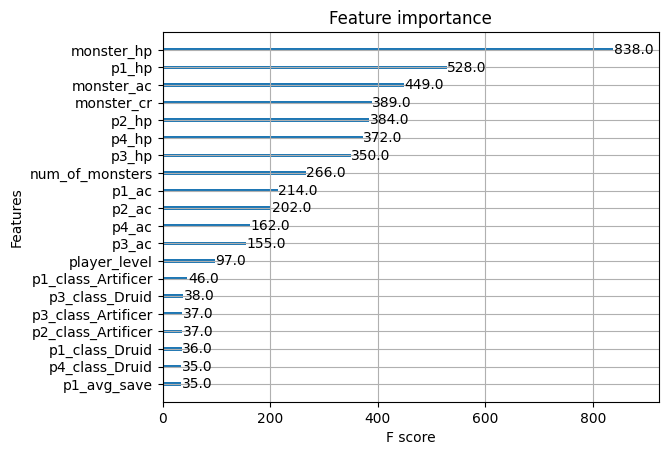

In [15]:
from xgboost import plot_importance

plot_importance(clfXGB, max_num_features=20, importance_type='weight')

# Hyperparameter tuning using GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
def parameter_search(params):
    search = GridSearchCV(xgb.XGBRegressor(
                            subsample=0.9,
                            colsample_bytree=0.5,
                            ),
                            param_grid=params,
                            scoring=['r2','neg_mean_squared_error'],
                            refit='r2',
                            n_jobs=-1,
                            cv=5,
                            verbose=2)
    search.fit(X_train, Y_train)
    print(search.best_score_)
    return search.best_params_

## Round 1

In [18]:
from sklearn.model_selection import GridSearchCV

search_sapce = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5],
    'base_score': [0.2, 0.5, 0.8],
}

parameter_search(search_sapce)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
0.7097076211617119


{'base_score': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 500,
 'reg_lambda': 10.0,
 'scale_pos_weight': 3}

## Round 2

In [20]:
search_sapce = {
    'n_estimators': [500, 800, 1000],
    'max_depth': [7,9,11],
    'learning_rate': [0.1, 0.25, 0.5],
    'gamma': [0],
    'reg_lambda': [10.0, 20.0, 30.0],
    'scale_pos_weight': [3],
    'base_score': [0.5],
}

parameter_search(search_sapce)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
0.717215467218782


{'base_score': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 1000,
 'reg_lambda': 20.0,
 'scale_pos_weight': 3}

## Round 3

In [21]:
params = {
    'n_estimators': [1000, 1250, 1500],
    'max_depth': [7],
    'learning_rate': [0.1],
    'gamma': [0],
    'reg_lambda': [20],
    'scale_pos_weight': [3],
    'base_score': [0.5],
}

parameter_search(params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.7180642260271091


{'base_score': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 1500,
 'reg_lambda': 20,
 'scale_pos_weight': 3}

## Round 4

In [22]:
params = {
    'n_estimators': [1500, 1750, 2000],
    'max_depth': [7],
    'learning_rate': [0.1],
    'gamma': [0],
    'reg_lambda': [20],
    'scale_pos_weight': [3],
    'base_score': [0.5],
}

parameter_search(params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.7180642260271091


{'base_score': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 1500,
 'reg_lambda': 20,
 'scale_pos_weight': 3}

In [23]:
FINAL_PARAMETERS = {'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 1500,
 'reg_lambda': 20,
 'scale_pos_weight': 3
 }

# Making the final regression model

In [24]:
model = xgb.XGBRegressor(**FINAL_PARAMETERS, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse',)
model.fit(  X_train,
            Y_train,
            eval_set=[(X_train, Y_train),(X_test, Y_test)],
            verbose=100
            
          )

[0]	validation_0-rmse:0.39129	validation_1-rmse:0.38940
[100]	validation_0-rmse:0.20061	validation_1-rmse:0.24074
[200]	validation_0-rmse:0.17162	validation_1-rmse:0.22649
[300]	validation_0-rmse:0.15070	validation_1-rmse:0.21828
[400]	validation_0-rmse:0.13656	validation_1-rmse:0.21554
[500]	validation_0-rmse:0.12211	validation_1-rmse:0.21224
[600]	validation_0-rmse:0.11100	validation_1-rmse:0.21018
[700]	validation_0-rmse:0.10289	validation_1-rmse:0.20911
[732]	validation_0-rmse:0.10096	validation_1-rmse:0.20894


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# R² score of the model

In [25]:
model.score(X_test, Y_test)

0.722908164673727

In [44]:
predict(model)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,p4_class_Cleric,p4_class_Druid,p4_class_Fighter,p4_class_Monk,p4_class_Paladin,p4_class_Ranger,p4_class_Rogue,p4_class_Sorcerer,p4_class_Warlock,p4_class_Wizzard
4163,9.0,19.0,2.0,5.0,13.0,2.0,8.0,11.0,2.0,10.0,...,False,False,False,False,False,False,False,False,False,False


Expected:  0.8936096718480139
Predicted:  0.923757
